# Grouping in pandas

In this notebook, we will explore various ways we can use pandas' grouping feature.

First, we will add into the pricing data two random categories. The first category `cat1` is a number between 1 and 10 (inclusive) and the second category `cat2` is a number between 1 and 4 (inclusive).

In [1]:
import pandas as pd
import numpy as np
import trading_calendar as tc
from matplotlib import pyplot as plt

np.random.seed(1)

def df2mdf(df, trading_day='C'):
    mdf = df.stack().to_frame(name='price')
    mdf.index.names = [None, None]
    new_dates = np.unique(mdf.apply(lambda x: pd.Timestamp(x.name[0], tz='UTC', freq=trading_day), axis=1).values)
    mdf.index = mdf.index.set_levels(new_dates, level=0)
    return mdf

df = pd.read_csv("prices.csv", index_col=0)
mdf = df2mdf(df, trading_day=tc.trading_day)
cat1 = np.floor(np.random.random(mdf.shape[0])*10)+1
mdf.loc[:, 'cat1'] = cat1
cat2 = np.floor(np.random.random(mdf.shape[0])*10 % 4)+1
mdf.loc[:, 'cat2'] = cat2
mdf.head(5)

price  cat1  cat2
2019-01-02 TSLA  310.1200   5.0   1.0
           MSFT   99.6466   8.0   4.0
           GE      7.7134   1.0   1.0
2019-01-03 TSLA  300.3600   4.0   1.0
           MSFT   95.9808   2.0   2.0

## Grouping by a column, then run aggregate functions

List of aggregate functions is available [here](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html).

In the code below, we group by `cat1` and get the mean price of each cat1 category.

In [2]:
g = mdf.groupby(by=['cat1'])['price'].mean()
g.head(5)

cat1
1.0    119.851586
2.0    138.942673
3.0    142.305359
4.0    122.690417
5.0    143.878131
Name: price, dtype: float64

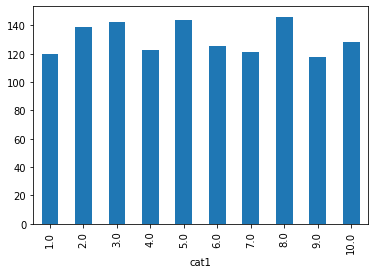

In [3]:
g.plot.bar()

Aggregate functions works with both DataFrame and Series objects.

## Grouping by multiple columns



In [4]:
gmul = mdf.groupby(by=['cat1', 'cat2']).mean()
gmul.head(5)

price
cat1 cat2            
1.0  1.0   127.802841
     2.0    94.417229
     3.0   219.601225
     4.0    75.213362
2.0  1.0   132.288426

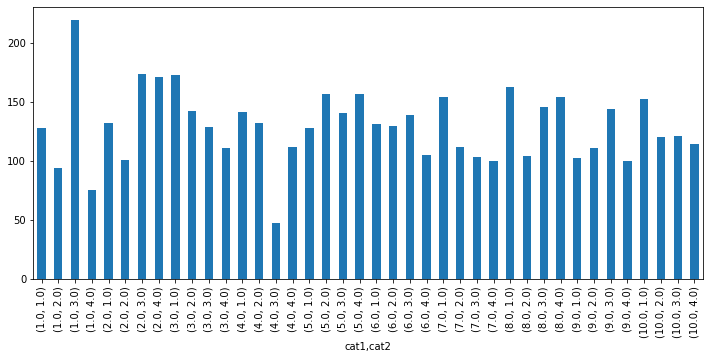

In [5]:
plt.figure(figsize=(12, 5))
gmul['price'].plot.bar()

## Grouping by index

In [6]:
mdf.groupby(mdf.index.get_level_values(0)).mean().head(5)

,price,cat1,cat2
2019-01-02,139.160000,4.666667,2.000000
2019-01-03,134.687900,2.333333,2.333333
2019-01-04,142.006867,3.333333,2.333333
2019-01-07,147.969133,6.000000,2.333333
2019-01-08,148.284700,4.333333,2.000000


In [7]:
mdf.groupby(level=0).mean().head(5)

,price,cat1,cat2
2019-01-02,139.160000,4.666667,2.000000
2019-01-03,134.687900,2.333333,2.333333
2019-01-04,142.006867,3.333333,2.333333
2019-01-07,147.969133,6.000000,2.333333
2019-01-08,148.284700,4.333333,2.000000


## Grouping by index and column

In [8]:
# by and level cannot be combined. This line will return an error.
mdf.groupby(by=['cat1'], level=0).mean().head(5)

TypeError: 'numpy.ndarray' object is not callable

In [9]:
mdf.groupby(by=['cat1', mdf.index.get_level_values(0)]).mean().head(5)

price  cat2
cat1                           
1.0  2019-01-02    7.7134   1.0
     2019-01-03    7.7229   4.0
     2019-01-08    8.2020   1.0
     2019-01-14    8.5278   2.0
     2019-01-15  344.4300   2.0